In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Reading the dataset
df = pd.read_csv("Match Winner.csv")
pd.set_option('display.max_columns', None)
print("Shape:", df.shape)
# Display the first 5 rows of the dataset
df.head()

Shape: (9380, 22)


,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,17,8,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,17,12,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,6,16,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,6,13,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,17,12,8,6,6,4,21,20,1,3,0,0


In [5]:
# Display the first 5 rows of the dataset
df.columns


Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')

In [6]:
# summary statistics for numerical columns
df.describe

<bound method NDFrame.describe of        Season   MatchDate        HomeTeam       AwayTeam  FullTimeHomeGoals  \
0     2000/01  2000-08-19        Charlton       Man City                  4   
1     2000/01  2000-08-19         Chelsea       West Ham                  4   
2     2000/01  2000-08-19        Coventry  Middlesbrough                  1   
3     2000/01  2000-08-19           Derby    Southampton                  2   
4     2000/01  2000-08-19           Leeds        Everton                  2   
...       ...         ...             ...            ...                ...   
9375  2024/25  2025-05-04       Brentford     Man United                  4   
9376  2024/25  2025-05-04        Brighton      Newcastle                  1   
9377  2024/25  2025-05-04        West Ham      Tottenham                  1   
9378  2024/25  2025-05-04         Chelsea      Liverpool                  3   
9379  2024/25  2025-05-05  Crystal Palace  Nott'm Forest                  1   

      FullTimeAwa

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             9380 non-null   object
 1   MatchDate          9380 non-null   object
 2   HomeTeam           9380 non-null   object
 3   AwayTeam           9380 non-null   object
 4   FullTimeHomeGoals  9380 non-null   int64 
 5   FullTimeAwayGoals  9380 non-null   int64 
 6   FullTimeResult     9380 non-null   object
 7   HalfTimeHomeGoals  9380 non-null   int64 
 8   HalfTimeAwayGoals  9380 non-null   int64 
 9   HalfTimeResult     9380 non-null   object
 10  HomeShots          9380 non-null   int64 
 11  AwayShots          9380 non-null   int64 
 12  HomeShotsOnTarget  9380 non-null   int64 
 13  AwayShotsOnTarget  9380 non-null   int64 
 14  HomeCorners        9380 non-null   int64 
 15  AwayCorners        9380 non-null   int64 
 16  HomeFouls          9380 non-null   int64 


In [8]:
# Checking null values in each column
df.isnull().sum()

Season               0
MatchDate            0
HomeTeam             0
AwayTeam             0
FullTimeHomeGoals    0
FullTimeAwayGoals    0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [9]:
# Dropping unnecessary columns that are not required for the analysis
drop_cols = ['Season','MatchDate','FullTimeHomeGoals','FullTimeAwayGoals']
cols_to_drop = [c for c in drop_cols if c in df.columns]
df = df.drop(columns=cols_to_drop)
print('Dropped:', cols_to_drop)

Dropped: ['Season', 'MatchDate', 'FullTimeHomeGoals', 'FullTimeAwayGoals']


In [10]:
# Print remaining columns
print(df.columns)

Index(['HomeTeam', 'AwayTeam', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')


In [11]:
#Check again for missing values after dropping columns
print(df.isnull().sum())

HomeTeam             0
AwayTeam             0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64


In [12]:
# Count the number of duplicate rows in the dataset
print(df.duplicated().sum())

0


In [13]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

In [14]:
# no duplicate rows left
print(df.duplicated().sum())

0


In [15]:
# cleaned dataset
df.to_csv("cleaned_Match_Winner.csv", index=False)

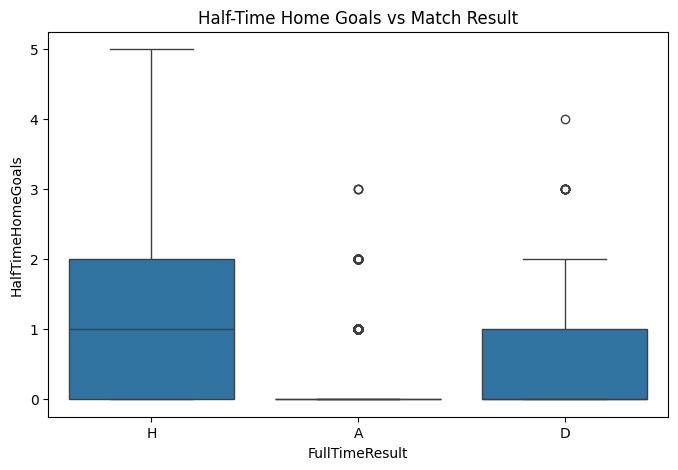

In [16]:
# Boxplot for HalfTimeHomeGoals vs FullTimeResult
plt.figure(figsize=(8,5))
sns.boxplot(x='FullTimeResult', y='HalfTimeHomeGoals', data=df)
plt.title("Half-Time Home Goals vs Match Result")
plt.show()

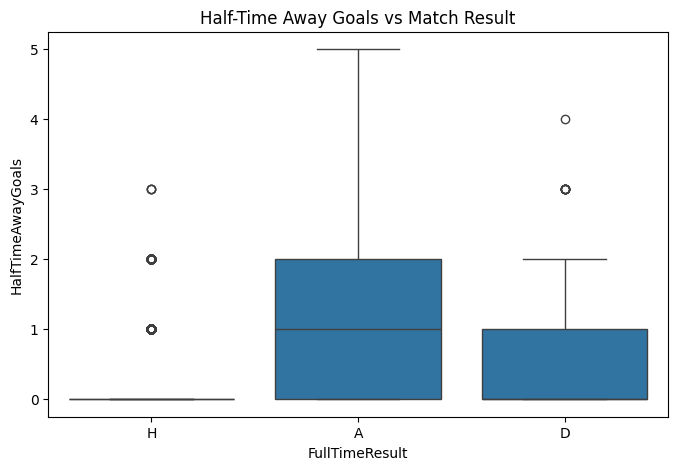

In [17]:
# Boxplot for HalfTimeAwayGoals vs FullTimeResult
plt.figure(figsize=(8,5))
sns.boxplot(x='FullTimeResult', y='HalfTimeAwayGoals', data=df)
plt.title("Half-Time Away Goals vs Match Result")
plt.show()

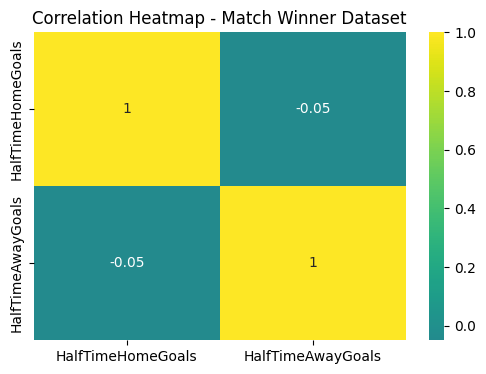

In [18]:
# numeric columns
numeric_cols = ['HalfTimeHomeGoals', 'HalfTimeAwayGoals']

# Correlation matrix
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='viridis', center=0)
plt.title("Correlation Heatmap - Match Winner Dataset")
plt.show()

In [19]:
display(df.head())
df.info()


,HomeTeam,AwayTeam,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,Charlton,Man City,H,2,0,H,17,8,14,4,6,6,13,12,1,2,0,0
1,Chelsea,West Ham,H,1,0,H,17,12,10,5,7,7,19,14,1,2,0,0
2,Coventry,Middlesbrough,A,1,1,D,6,16,3,9,8,4,15,21,5,3,1,0
3,Derby,Southampton,D,1,2,A,6,13,4,6,5,8,11,13,1,1,0,0
4,Leeds,Everton,H,2,0,H,17,12,8,6,6,4,21,20,1,3,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HomeTeam           9380 non-null   object
 1   AwayTeam           9380 non-null   object
 2   FullTimeResult     9380 non-null   object
 3   HalfTimeHomeGoals  9380 non-null   int64 
 4   HalfTimeAwayGoals  9380 non-null   int64 
 5   HalfTimeResult     9380 non-null   object
 6   HomeShots          9380 non-null   int64 
 7   AwayShots          9380 non-null   int64 
 8   HomeShotsOnTarget  9380 non-null   int64 
 9   AwayShotsOnTarget  9380 non-null   int64 
 10  HomeCorners        9380 non-null   int64 
 11  AwayCorners        9380 non-null   int64 
 12  HomeFouls          9380 non-null   int64 
 13  AwayFouls          9380 non-null   int64 
 14  HomeYellowCards    9380 non-null   int64 
 15  AwayYellowCards    9380 non-null   int64 
 16  HomeRedCards       9380 non-null   int64 


In [20]:
#Load cleaned dataset
df = pd.read_csv("cleaned_Match_Winner.csv")


In [21]:
#Label Encoding
#encoding 'FullTimeResult' ,'HalfTimeResult', 'Home team', 'Away Team' categorical Data

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print("✅ Label Encoding applied to all categorical columns (changes kept in the same dataframe).")


Encoded HomeTeam: {'Arsenal': np.int64(0), 'Aston Villa': np.int64(1), 'Birmingham': np.int64(2), 'Blackburn': np.int64(3), 'Blackpool': np.int64(4), 'Bolton': np.int64(5), 'Bournemouth': np.int64(6), 'Bradford': np.int64(7), 'Brentford': np.int64(8), 'Brighton': np.int64(9), 'Burnley': np.int64(10), 'Cardiff': np.int64(11), 'Charlton': np.int64(12), 'Chelsea': np.int64(13), 'Coventry': np.int64(14), 'Crystal Palace': np.int64(15), 'Derby': np.int64(16), 'Everton': np.int64(17), 'Fulham': np.int64(18), 'Huddersfield': np.int64(19), 'Hull': np.int64(20), 'Ipswich': np.int64(21), 'Leeds': np.int64(22), 'Leicester': np.int64(23), 'Liverpool': np.int64(24), 'Luton': np.int64(25), 'Man City': np.int64(26), 'Man United': np.int64(27), 'Middlesbrough': np.int64(28), 'Newcastle': np.int64(29), 'Norwich': np.int64(30), "Nott'm Forest": np.int64(31), 'Portsmouth': np.int64(32), 'QPR': np.int64(33), 'Reading': np.int64(34), 'Sheffield United': np.int64(35), 'Southampton': np.int64(36), 'Stoke': n

In [22]:
#display dataset after applying label encoding
df.head()

,HomeTeam,AwayTeam,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,12,26,2,2,0,2,17,8,14,4,6,6,13,12,1,2,0,0
1,13,43,2,1,0,2,17,12,10,5,7,7,19,14,1,2,0,0
2,14,28,0,1,1,1,6,16,3,9,8,4,15,21,5,3,1,0
3,16,36,1,1,2,0,6,13,4,6,5,8,11,13,1,1,0,0
4,22,17,2,2,0,2,17,12,8,6,6,4,21,20,1,3,0,0


In [23]:
#Model Training
# Define features (X) and target (y)
X = df.drop("FullTimeResult", axis=1)   # all columns except target
y = df["FullTimeResult"]                # target variable

In [24]:
print(X)

      HomeTeam  AwayTeam  HalfTimeHomeGoals  HalfTimeAwayGoals  \
0           12        26                  2                  0   
1           13        43                  1                  0   
2           14        28                  1                  1   
3           16        36                  1                  2   
4           22        17                  2                  0   
...        ...       ...                ...                ...   
9375         8        27                  2                  1   
9376         9        29                  1                  0   
9377        43        40                  1                  1   
9378        13        24                  1                  0   
9379        15        31                  0                  0   

      HalfTimeResult  HomeShots  AwayShots  HomeShotsOnTarget  \
0                  2         17          8                 14   
1                  2         17         12                 10   
2           

In [25]:
print(y.value_counts())


FullTimeResult
2    4299
0    2768
1    2313
Name: count, dtype: int64


In [26]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# Initialize the model (Random Forest is good for categorical + numerical mix)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:

# Make predictions
y_pred = model.predict(X_test)


In [29]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6396588486140725

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66       539
           1       0.44      0.27      0.34       474
           2       0.71      0.80      0.75       863

    accuracy                           0.64      1876
   macro avg       0.59      0.59      0.58      1876
weighted avg       0.62      0.64      0.62      1876


Confusion Matrix:
 [[378  81  80]
 [145 129 200]
 [ 84  86 693]]


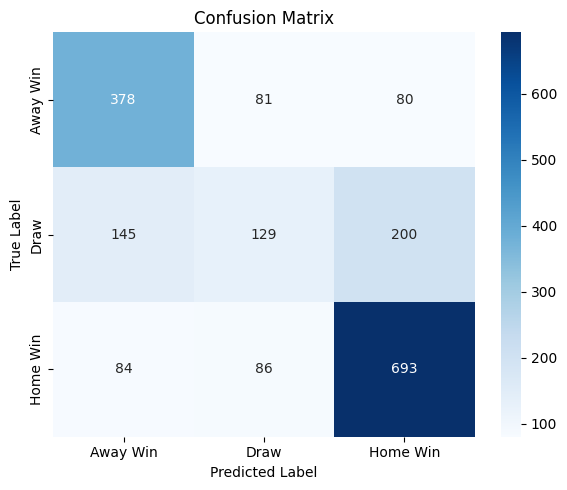

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 📊 Plot using seaborn
cm = confusion_matrix(y_test, y_pred)
class_names=['Away Win', 'Draw', 'Home Win']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model Train 
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)      

# Predict 
y_pred = reg.predict(X_test)

# Metrics calculate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Results print
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R^2 Score:", round(r2, 3))

Mean Absolute Error (MAE): 0.488
Mean Squared Error (MSE): 0.398
Root Mean Squared Error (RMSE): 0.631
R^2 Score: 0.446


In [32]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# RandomForest Model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter Grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],    
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],    
    "max_features": ["sqrt", "log2"]  
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best Model
model = grid_search.best_estimator_

# Predictions
y_pred = model.predict(X_test)


print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
 Accuracy: 0.6332622601279317

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.70      0.66       554
           1       0.39      0.22      0.28       462
           2       0.70      0.81      0.75       860

    accuracy                           0.63      1876
   macro avg       0.57      0.58      0.57      1876
weighted avg       0.60      0.63      0.61      1876


Confusion Matrix:
 [[389  73  92]
 [152 102 208]
 [ 79  84 697]]


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)


# Predictions & Evaluation
y_pred = dt.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, ))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.5447761194029851

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57       554
           1       0.32      0.36      0.34       462
           2       0.67      0.62      0.65       860

    accuracy                           0.54      1876
   macro avg       0.52      0.52      0.52      1876
weighted avg       0.55      0.54      0.55      1876


Confusion Matrix:
 [[319 136  99]
 [136 166 160]
 [114 209 537]]


In [34]:
#Select the best model based on accuracy
# Here, we assume Random Forest performed the best
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest is good for categorical + numerical mix)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.6396588486140725

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66       539
           1       0.44      0.27      0.34       474
           2       0.71      0.80      0.75       863

    accuracy                           0.64      1876
   macro avg       0.59      0.59      0.58      1876
weighted avg       0.62      0.64      0.62      1876


Confusion Matrix:
 [[378  81  80]
 [145 129 200]
 [ 84  86 693]]


In [37]:
import joblib

# Save models
joblib.dump(best_model, "match_winner_model.pkl",compress=3)
print("✅ Model saved as match_winner_model.pkl")

✅ Model saved as match_winner_model.pkl
